In [1]:
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, NMF, KernelPCA
from preprocess_df import process_df
import pandas as pd
import numpy as np 

In [2]:

df = pd.read_csv('attack1.csv')



In [3]:
processed_df = process_df(df)

In [4]:
processed_df.shape

(1070554, 72)

In [5]:
steps = [50, 100,200,500, 1000, 5000, 10000, 20000]

In [6]:
algorithms = [PCA(n_components=3), TruncatedSVD(n_components=3), FastICA(n_components=3), KernelPCA(n_components=3, kernel='rbf')]

In [7]:
from collections import defaultdict
import time 

algo_time_dict = defaultdict(list)

for step in steps:
    for algorithm in algorithms:
        start = time.time()
        step_df = processed_df[:step]
        processed_df_reduced = algorithm.fit_transform(step_df)
        time_taken = time.time() - start
        
        algo_time_dict[algorithm.__class__.__name__].append(time_taken)
         
        
        

In [8]:
algo_time_dict

defaultdict(list,
            {'PCA': [0.006525993347167969,
              0.008327245712280273,
              0.012659072875976562,
              0.020853042602539062,
              0.007874250411987305,
              0.030194997787475586,
              0.05595684051513672,
              0.07293415069580078],
             'TruncatedSVD': [0.012747049331665039,
              0.0031561851501464844,
              0.0029058456420898438,
              0.021661043167114258,
              0.007875919342041016,
              0.01777195930480957,
              0.04035210609436035,
              0.07182908058166504],
             'FastICA': [0.005003929138183594,
              0.004443168640136719,
              0.013251066207885742,
              0.018799304962158203,
              0.03077411651611328,
              0.08550715446472168,
              0.11551094055175781,
              0.14586305618286133],
             'KernelPCA': [0.014377117156982422,
              0.0179898738861084,
     

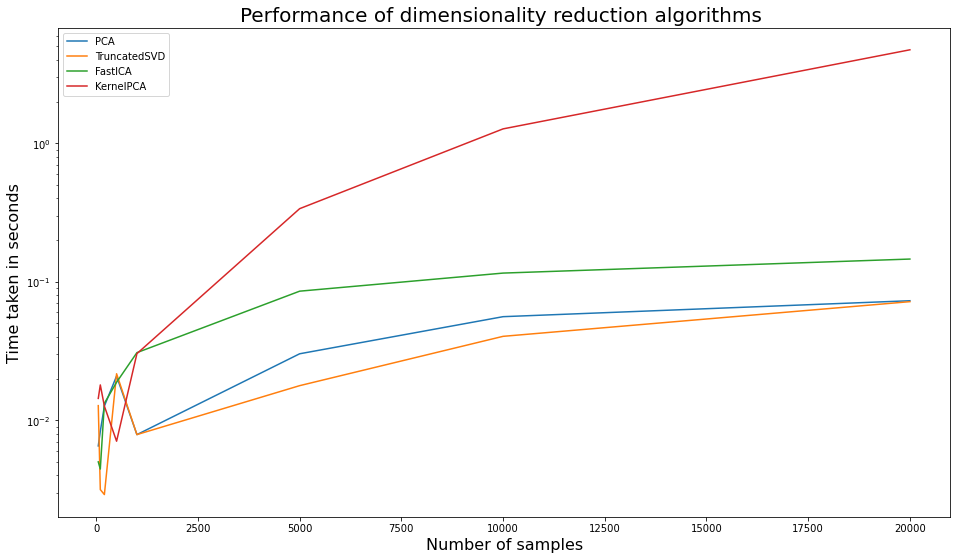

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,9)

for algo, time_spent in algo_time_dict.items():
    plt.plot(steps, time_spent, label = algo)


plt.xlabel('Number of samples', fontsize=16)
plt.ylabel('Time taken in seconds',fontsize=16)
plt.title("Performance of dimensionality reduction algorithms ", fontsize=20)
plt.semilogy()
plt.legend()
plt.savefig("comaprison_dr.jpg", dpi = 300, bbox_inches='tight')
plt.show()

In [15]:
processed_df_reduced = TruncatedSVD(n_components=3).fit_transform(processed_df.values)